# Sobre o algoritmo

O intuito desse jupyter notebook é desenvolver o algoritmo de rank de grafo, tendo como base o algoritmo PageRank de Stanford, criado por Larry Page, co-fundador da Google, muito utilizado para ranquear as páginas mais relevantes da Web pelos hiperlink conectados.

----------------
Bibliotecas utilizadas

In [595]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

-----------------------
Criando Grafo com arestas direcionadas

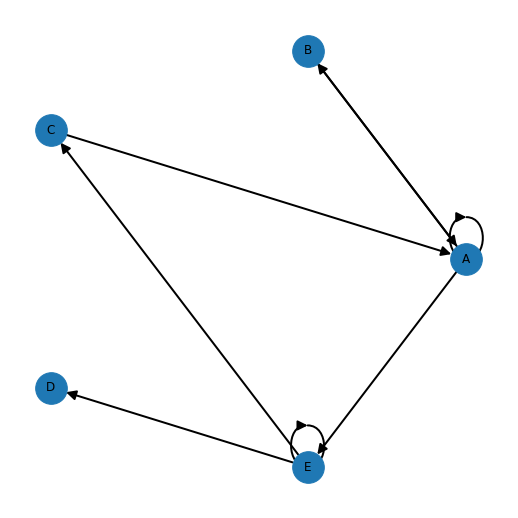

In [596]:
def create_graph(nodes, edges):
    G = nx.DiGraph()
    for i in range(nodes):
        G.add_node(chr(i+65))
    
    for i in range(edges):
        G.add_edge(chr(random.randint(65, nodes+64)), chr(random.randint(65, nodes+64)))

    return G

G = create_graph(5, 10)

options = {
    'arrowsize': 20,
    'width': 2,
    'arrowstyle': '-|>'
}

pos = nx.circular_layout(G, scale=1)
nx.draw(G, pos, with_labels=True, **options, node_size=1000)
plt.show()


----------------
Criando matriz de adjacências para melhor visualização do grafo

[[1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1.]]


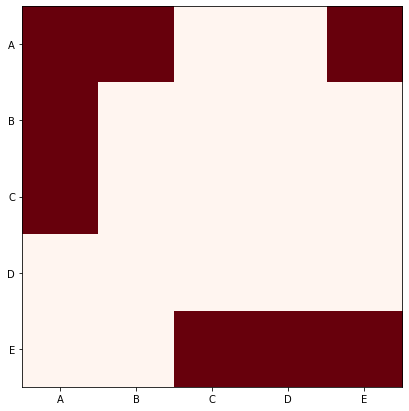

In [597]:
matriz = nx.to_numpy_matrix(G)
# matriz = matriz.astype(float)
print(matriz)


plt.imshow(matriz, cmap='Reds', interpolation='nearest')
plt.xticks(range(len(matriz)), list(G.nodes()))
plt.yticks(range(len(matriz)), list(G.nodes()))
plt.show()


----------------
Ajuste estocástico para tranformar a matriz padrão em matriz de probabilidade de transição

In [598]:
matriz_prob = np.zeros((len(matriz), len(matriz)))

for i in range(len(matriz)):
    for j in range(len(matriz)):
        if np.sum(matriz[i,:]) == 0:
            matriz_prob[i,j] = 1 / len(matriz)
        else: 
            matriz_prob[i,j] = matriz[i,j] / np.sum(matriz[i,:])

print(matriz_prob)



[[0.33333333 0.33333333 0.         0.         0.33333333]
 [1.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.        ]
 [0.2        0.2        0.2        0.2        0.2       ]
 [0.         0.         0.33333333 0.33333333 0.33333333]]


----------------

Calculo de ranqueamento dos nós:

<div style="background-color: white; width: 300px">
    <img src="calc_to_rank.png">
</div>

In [606]:
def rank_to_graph(matriz_prob, rank_nodes):
    list_nodes = np.zeros(len(matriz))

    for i in range(len(matriz_prob)):
        for j in range(len(matriz_prob)):
            if i != j:
                list_nodes[i] += rank_nodes[i] / np.sum(1 if matriz_prob[i,j] != 0 else 0)
        print(list_nodes)
    return list_nodes


[0.  0.2 inf inf 0.2]
[0.2 0.2 inf inf inf]
[0.4 inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[ 0. inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[ 0. inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[ 0. inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[ 0. inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[ 0. inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[ 0. inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[ 0. inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[ 0. inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[inf inf inf inf inf]
[ 0. inf i

C:\Users\André da Rocha Souza\AppData\Local\Temp\ipykernel_7448\100873607.py:7: RuntimeWarning: divide by zero encountered in true_divide
  list_nodes[j] += rank_nodes[i] / np.sum(1 if matriz_prob[i,j] != 0 else 0)


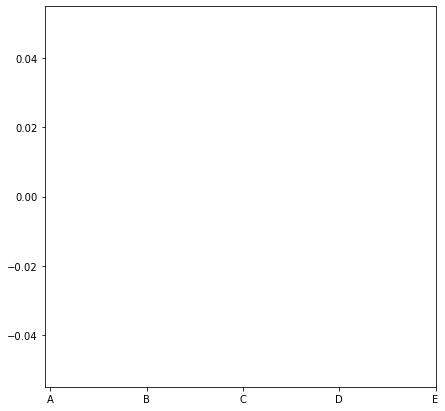

In [605]:
rank_nodes = [1 / len(matriz) for i in range(len(matriz))]
for i in range(10):
    rank_nodes = rank_to_graph(matriz, rank_nodes)

print(sum(rank_nodes))

# mostrar grafi  de bar com a legenda em ordem alfabética
plt.bar(range(len(rank_nodes)), rank_nodes)
plt.xticks(range(len(rank_nodes)), list(G.nodes()))
plt.show()




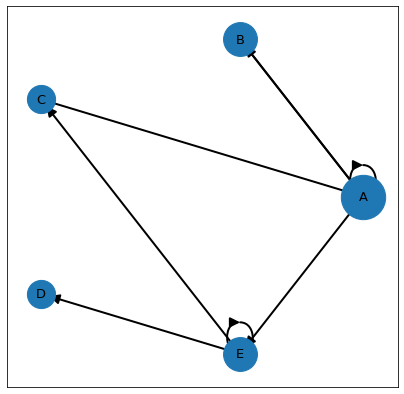

In [601]:
pos = nx.circular_layout(G, scale=1)

for i in range(len(rank_nodes)):
    nx.draw_networkx_nodes(G, pos, nodelist=[chr(i+65)], node_size=rank_nodes[i] * 10000)

nx.draw_networkx_edges(G, pos, **options, alpha=1)
nx.draw_networkx_labels(G, pos, font_size=13, font_family='sans-serif')
plt.show()

----------------

## Referências de estudos:

Algoritmo e cálculo para relevância do nó no grafo -
<a>https://pt.wikipedia.org/wiki/PageRank</a>

Biblioteca de grafos -
<a>https://networkx.org/documentation/stable/developer/index.html</a>